In [80]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [3]:
accidents = pd.read_csv('datasets\\accident_data.csv')
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accidents.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [8]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [9]:
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [10]:
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [11]:
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4520
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [12]:
accidents['Road_Type'] = accidents['Road_Type'].fillna(accidents['Road_Type'].mode()[0])
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                      0
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [13]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')
accidents.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [14]:
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('unaccounted')
accidents.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
dtype: int64

In [15]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [16]:
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['DayOfWeek'] = accidents['Accident Date'].dt.dayofweek

accidents.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

In [17]:
accidents['Year'].value_counts()

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

In [18]:
accidents['District Area'].value_counts().head(10)

District Area
Birmingham          13491
Leeds                8898
Manchester           6720
Bradford             6212
Sheffield            5710
Westminster          5706
Liverpool            5587
Glasgow City         4942
Bristol, City of     4819
Kirklees             4690
Name: count, dtype: int64

<h1 style=background-color:orange>Year using Bar Graph</h1>

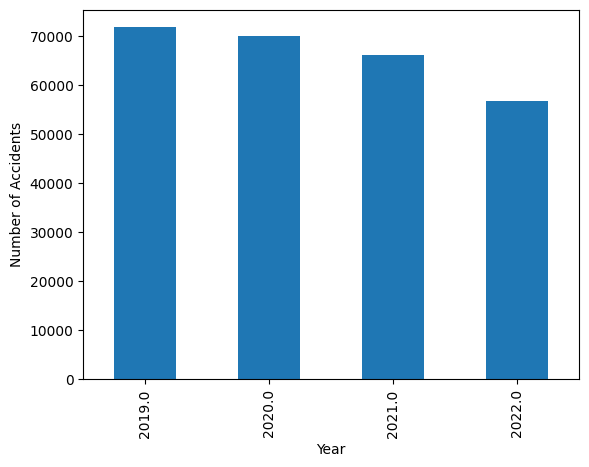

In [19]:
accidents_per_year = accidents['Year'].value_counts().sort_index()
accidents_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

<h1 style=background-color:orange>Month and Accident Severity using Bar Graph</h1>

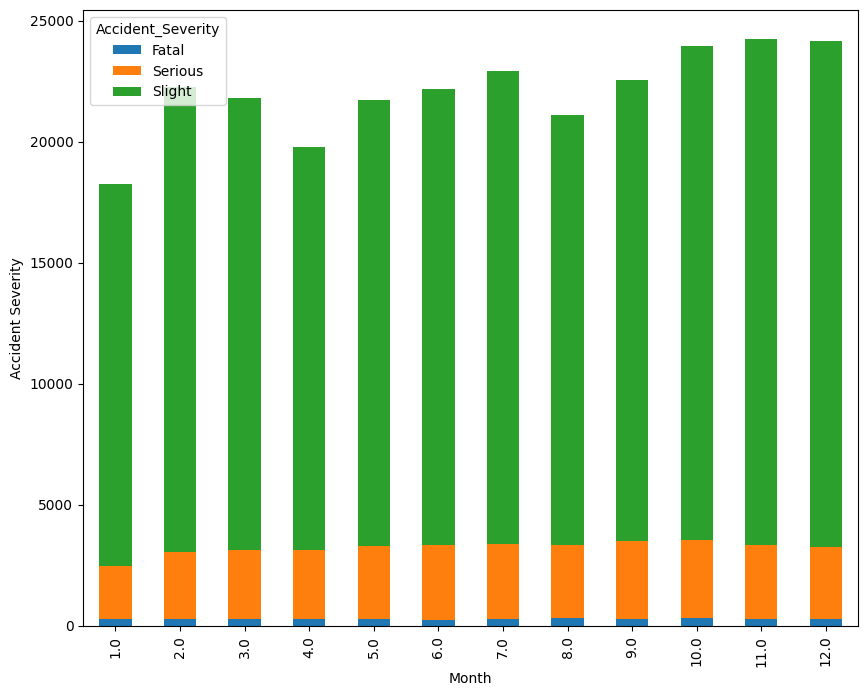

In [20]:
accidents_per_month_severity = accidents.groupby(['Month', 'Accident_Severity']).size().unstack()
accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Accident Severity')
plt.gcf().set_size_inches(10,8)
plt.show()

<h1 style=background-color:orange>District Area and Year using Line Graph</h1>

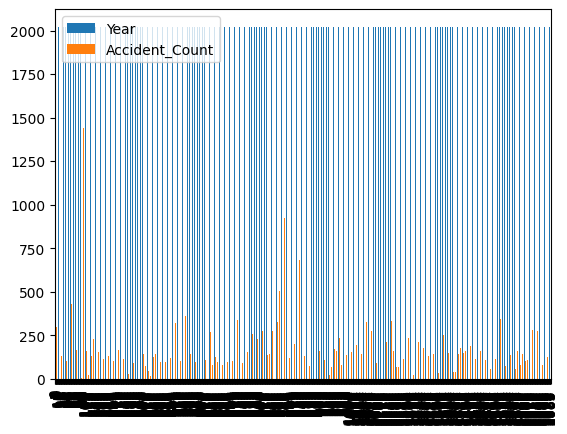

In [21]:
year_area = accidents.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')
year_area.plot(kind='bar')
plt.show()

<h1 style=background-color:orange>District Area and Year using Line Graph</h1>
<h3 style=background-color:orange>Top 10 District Area</h3>

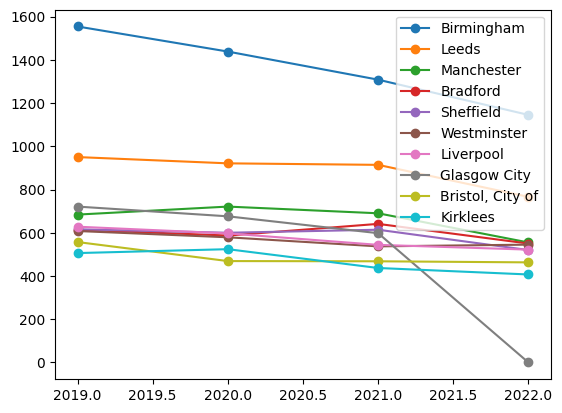

In [22]:
year_area = accidents.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')
#PIVOT TABLE
district_yr = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')

plt.plot(district_yr.index, district_yr['Birmingham'], label='Birmingham', marker='o')
plt.plot(district_yr.index, district_yr['Leeds'], label='Leeds', marker='o')
plt.plot(district_yr.index, district_yr['Manchester'], label='Manchester', marker='o')
plt.plot(district_yr.index, district_yr['Bradford'], label='Bradford', marker='o')
plt.plot(district_yr.index, district_yr['Sheffield'], label='Sheffield', marker='o')
plt.plot(district_yr.index, district_yr['Westminster'], label='Westminster', marker='o')
plt.plot(district_yr.index, district_yr['Liverpool'], label='Liverpool', marker='o')
plt.plot(district_yr.index, district_yr['Glasgow City'], label='Glasgow City', marker='o')
plt.plot(district_yr.index, district_yr['Bristol, City of'], label='Bristol, City of', marker='o')
plt.plot(district_yr.index, district_yr['Kirklees'], label='Kirklees', marker='o')

plt.legend()
plt.show()

<h1 style=background-color:gray></h1>

<h1 style=background-color:yellow>Q1. How many Accidents happened under Light Conditions in 2019?</h1>
<h1>Insights #1</h1>
<h3>73.08% accidents happened under Daylight Condtitions in 2019</h3>

In [23]:
q1 = accidents[accidents['Year'] == 2019]
q1

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,7.0,2.0,1.0
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,unaccounted,Other vehicle,2019.0,9.0,3.0,1.0
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,9.0,5.0,3.0
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182097,2.01E+12,Slight,2019-11-07,55.212275,Darkness - no lighting,Dumfries and Galloway,-3.413007,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019.0,11.0,7.0,3.0
182101,2.01E+12,Slight,2019-12-02,55.009139,Daylight,Dumfries and Galloway,-3.319379,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019.0,12.0,2.0,0.0
182102,2.01E+12,Slight,2019-12-03,54.993061,Daylight,Dumfries and Galloway,-3.131122,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2019.0,12.0,3.0,1.0
182103,2.01E+12,Serious,2019-12-06,55.127391,Darkness - lights lit,Dumfries and Galloway,-3.439964,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2019.0,12.0,6.0,4.0


In [24]:
q1['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       52518
Darkness - lights lit          14124
Darkness - no lighting          4242
Darkness - lighting unknown      719
Darkness - lights unlit          264
Name: count, dtype: int64

In [25]:
q1['Light_Conditions'].value_counts().sum()

71867

<h1 style=background-color:lightblue>Q1.</h1>

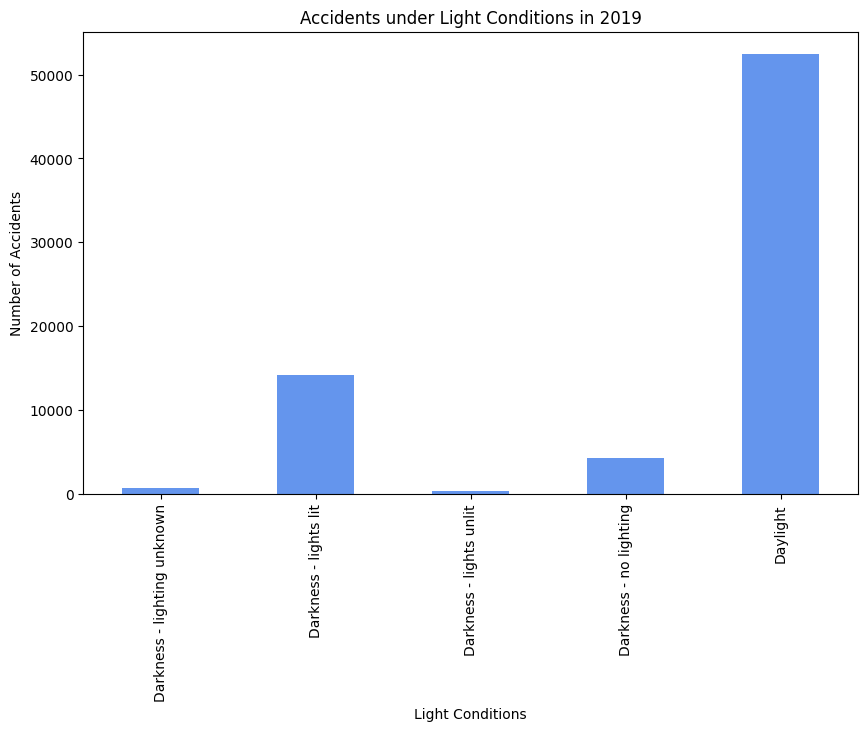

In [26]:
q1_2019 = accidents[accidents['Year'] == 2019].groupby(['Light_Conditions']).size()
q1_2019.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents under Light Conditions in 2019')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q2. How many Accidents happened under Light Conditions in 2020?</h1>
<h1>Insights #2</h1>
<h3>73.55% accidents happened under Daylight Condtitions in 2020</h3>

In [27]:
q2 = accidents[accidents['Year'] == 2020]
q2

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
182120,200801BS70001,Serious,2020-01-02,51.491521,Darkness - lights lit,Kensington and Chelsea,-0.179406,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,2.0,3.0
182121,200801BS70002,Slight,2020-01-06,51.484909,Darkness - lights lit,Kensington and Chelsea,-0.176356,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020.0,1.0,6.0,0.0
182122,200801BS70003,Serious,2020-01-12,51.509965,Daylight,Kensington and Chelsea,-0.197405,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,12.0,6.0
182123,200801BS70004,Slight,2020-01-05,51.490631,Darkness - lights lit,Kensington and Chelsea,-0.185779,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,5.0,6.0
182124,200801BS70005,Slight,2020-01-03,51.509712,Darkness - lights lit,Kensington and Chelsea,-0.192659,3,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352694,2.01E+12,Slight,2020-11-01,55.267100,Darkness - no lighting,Dumfries and Galloway,-2.959324,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,1.0,6.0
352695,2.01E+12,Slight,2020-11-02,54.985218,Daylight,Dumfries and Galloway,-3.278743,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020.0,11.0,2.0,0.0
352696,2.01E+12,Slight,2020-11-06,55.126057,Darkness - no lighting,Dumfries and Galloway,-3.344404,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,6.0,4.0
352697,2.01E+12,Serious,2020-11-04,55.243971,Darkness - no lighting,Dumfries and Galloway,-3.461163,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,4.0,2.0


In [28]:
q2['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       51605
Darkness - lights lit          13467
Darkness - no lighting          4085
Darkness - lighting unknown      717
Darkness - lights unlit          289
Name: count, dtype: int64

In [29]:
q2['Light_Conditions'].value_counts().sum()

70163

<h1 style=background-color:lightblue>Q2.</h1>

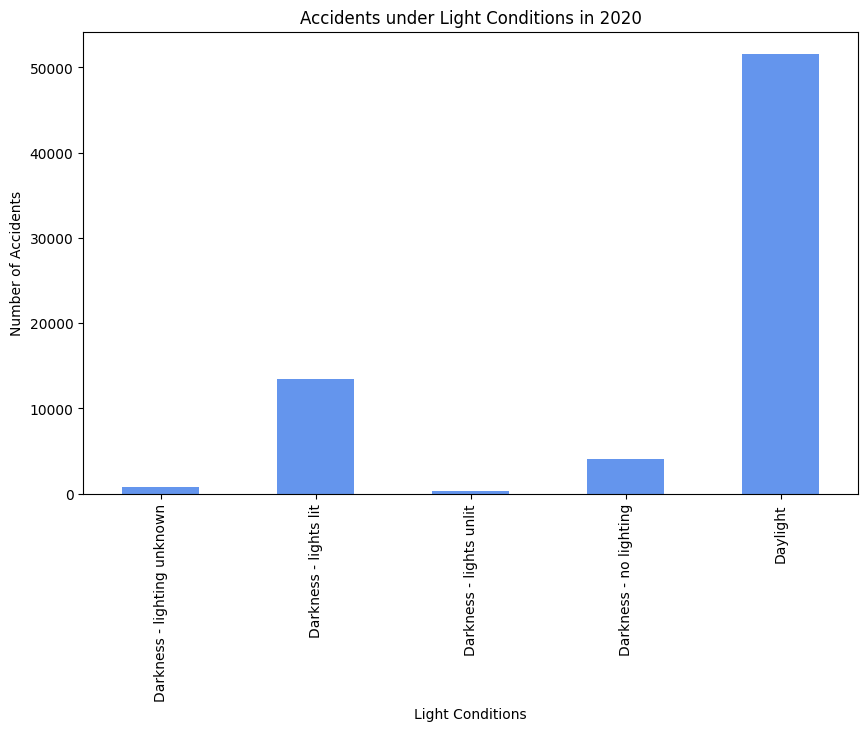

In [30]:
q2_2020 = accidents[accidents['Year'] == 2020].groupby(['Light_Conditions']).size()
q2_2020.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents under Light Conditions in 2020')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q3. How many Accidents happened under Light Conditions in 2021?</h1>
<h1>Insights #3</h1>
<h3>72.85% accidents happened under Daylight Condtitions in 2021</h3>

In [31]:
q3 = accidents[accidents['Year'] == 2021]
q3

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021.0,1.0,1.0,4.0
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,5.0,1.0
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,4.0,0.0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021.0,1.0,5.0,1.0
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516241,2.01E+12,Slight,2021-11-12,55.358904,Daylight,Dumfries and Galloway,-3.513667,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2021.0,11.0,12.0,4.0
516242,2.01E+12,Slight,2021-11-12,55.166976,Darkness - no lighting,Dumfries and Galloway,-3.389896,1,1,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2021.0,11.0,12.0,4.0
516247,2.01E+12,Slight,2021-12-01,55.115346,Darkness - no lighting,Dumfries and Galloway,-3.409426,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021.0,12.0,1.0,2.0
516250,2.01E+12,Slight,2021-12-01,55.313433,Darkness - lights lit,Dumfries and Galloway,-3.454262,1,1,Snow,Dual carriageway,Rural,Snowing no high winds,Car,2021.0,12.0,1.0,2.0


In [32]:
q3['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       48212
Darkness - lights lit          13298
Darkness - no lighting          3756
Darkness - lighting unknown      643
Darkness - lights unlit          263
Name: count, dtype: int64

In [33]:
q3['Light_Conditions'].value_counts().sum()

66172

<h1 style=background-color:lightblue>Q3.</h1>

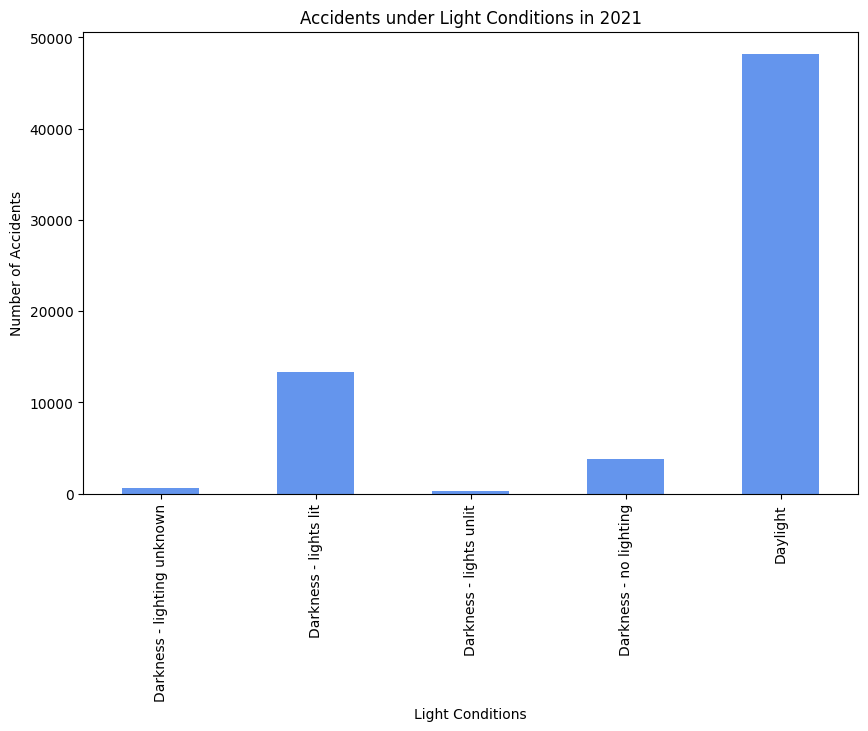

In [34]:
q3_2021 = accidents[accidents['Year'] == 2021].groupby(['Light_Conditions']).size()
q3_2021.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents under Light Conditions in 2021')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q4. How many Accidents happened under Light Conditions in 2022?</h1>
<h1>Insights #4</h1>
<h3>75.05% accidents happened under Daylight Condtitions in 2022</h3>

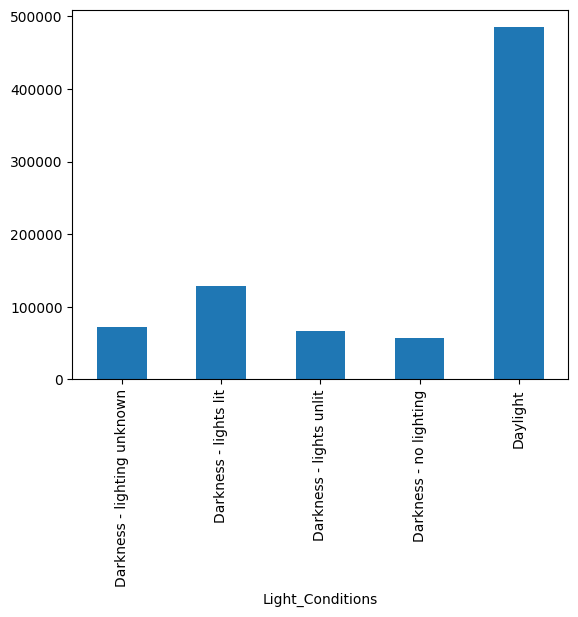

In [35]:
accidents_per_year = accidents['Year'].value_counts().sort_index()
accidents_light_conditions = accidents['Light_Conditions'].value_counts().sort_index()
accidents_per_year.plot(kind='bar')
accidents_light_conditions.plot(kind='bar')
plt.show()

In [36]:
q4 = accidents[accidents['Year'] == 2022]
q4

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
516260,201001BS70003,Slight,2022-01-11,51.484087,Daylight,Kensington and Chelsea,-0.164002,1,2,Wet or damp,Single carriageway,Urban,Other,Car,2022.0,1.0,11.0,1.0
516261,201001BS70004,Slight,2022-01-11,51.509212,Darkness - lights lit,Kensington and Chelsea,-0.195273,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022.0,1.0,11.0,1.0
516262,201001BS70006,Slight,2022-01-12,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022.0,1.0,12.0,2.0
516263,201001BS70007,Slight,2022-01-02,51.513314,Darkness - lights lit,Kensington and Chelsea,-0.198858,1,2,Dry,Roundabout,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022.0,1.0,2.0,6.0
516264,201001BS70008,Slight,2022-01-04,51.484361,Darkness - lights lit,Kensington and Chelsea,-0.175802,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2022.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660657,201091NM00057,Slight,2022-01-02,57.167726,Daylight,Highland,-3.830273,1,1,Snow,Single carriageway,Rural,Fine no high winds,Car,2022.0,1.0,2.0,6.0
660658,201091NM00102,Slight,2022-01-03,57.003355,Daylight,Highland,-4.169644,1,2,Snow,Dual carriageway,Rural,Other,Car,2022.0,1.0,3.0,0.0
660659,201091NM00140,Slight,2022-01-05,57.248688,Daylight,Highland,-3.798648,1,2,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022.0,1.0,5.0,2.0
660660,201091NM00296,Slight,2022-01-08,57.293658,Daylight,Highland,-3.630574,1,2,Frost or ice,Single carriageway,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022.0,1.0,8.0,5.0


In [37]:
q4['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       42636
Darkness - lights lit          10653
Darkness - no lighting          2802
Darkness - lighting unknown      511
Darkness - lights unlit          203
Name: count, dtype: int64

In [38]:
q4['Light_Conditions'].value_counts().sum()

56805

<h1 style=background-color:lightblue>Q4.</h1>

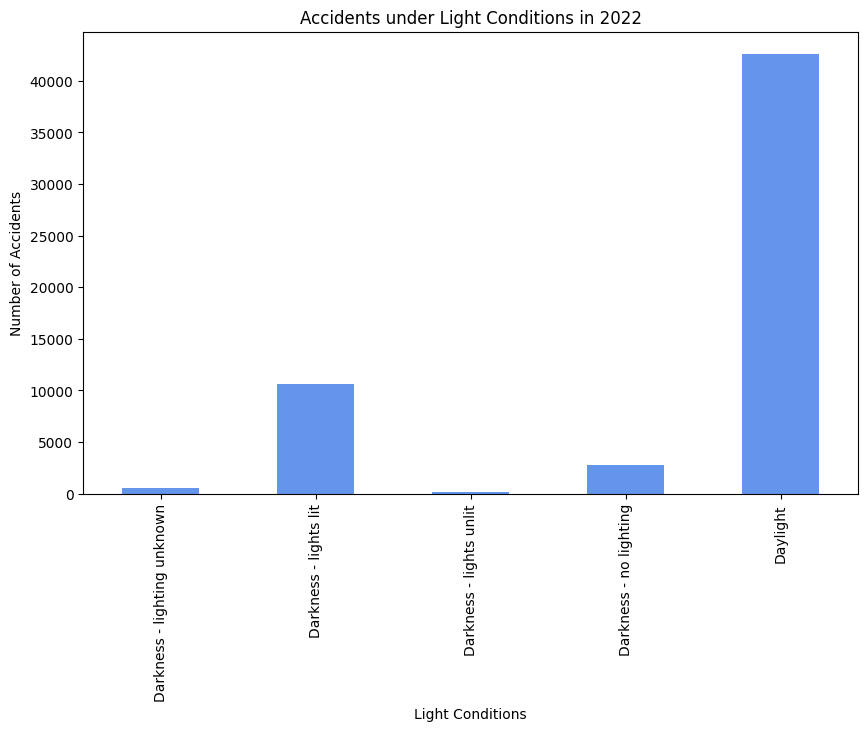

In [39]:
q4_2022 = accidents[accidents['Year'] == 2022].groupby(['Light_Conditions']).size()
q4_2022.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents under Light Conditions in 2022')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q5. What year has the most recorded in light Conditions?</h1>
<h1>Insights #5</h1>
<h3>Year 2019 has the most recorded.</h3>

<h1 style=background-color:lightblue>Q5.</h1>

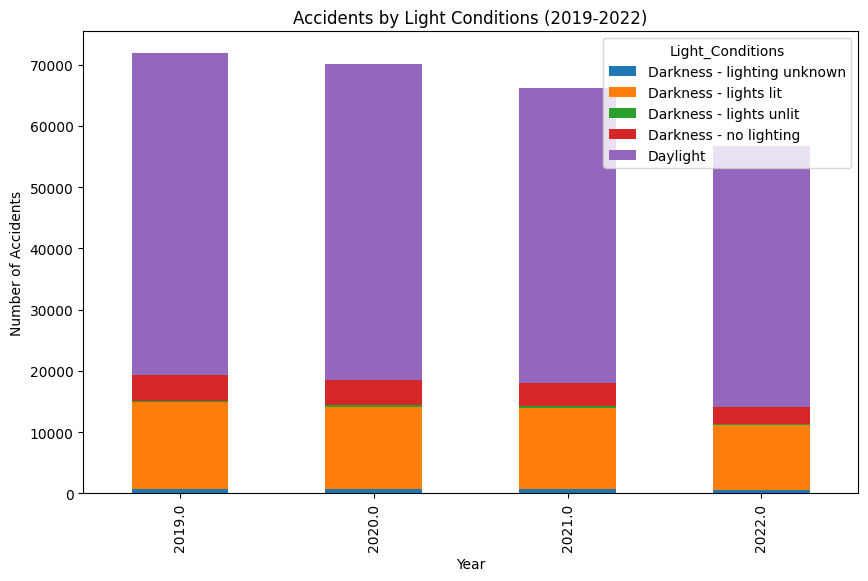

In [40]:
q5_bars = accidents[accidents['Year'].between(2019, 2022)].groupby(['Year', 'Light_Conditions']).size().unstack()
q5_bars.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Light Conditions (2019-2022)')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q6. How many Accidents happened under Accident Severity in 2019?</h1>
<h1>Insights #6</h1>
<h3>Slight Severity that have 84.78% in year 2019.</h3>

In [41]:
q6 = accidents[accidents['Year'] == 2019]
q6

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,7.0,2.0,1.0
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,unaccounted,Other vehicle,2019.0,9.0,3.0,1.0
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,9.0,5.0,3.0
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182097,2.01E+12,Slight,2019-11-07,55.212275,Darkness - no lighting,Dumfries and Galloway,-3.413007,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019.0,11.0,7.0,3.0
182101,2.01E+12,Slight,2019-12-02,55.009139,Daylight,Dumfries and Galloway,-3.319379,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019.0,12.0,2.0,0.0
182102,2.01E+12,Slight,2019-12-03,54.993061,Daylight,Dumfries and Galloway,-3.131122,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2019.0,12.0,3.0,1.0
182103,2.01E+12,Serious,2019-12-06,55.127391,Darkness - lights lit,Dumfries and Galloway,-3.439964,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2019.0,12.0,6.0,4.0


In [42]:
q6['Accident_Severity'].value_counts()

Accident_Severity
Slight     60928
Serious     9823
Fatal       1116
Name: count, dtype: int64

In [43]:
q6['Accident_Severity'].value_counts().sum()

71867

<h1 style=background-color:lightblue>Q6.</h1>

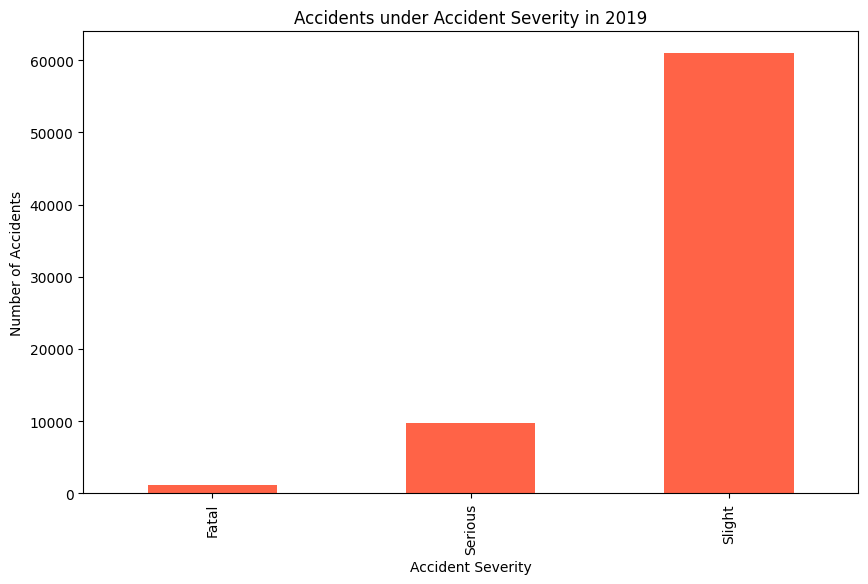

In [44]:
q6_2019 = accidents[accidents['Year'] == 2019].groupby(['Accident_Severity']).size()
q6_2019.plot(kind='bar', color='tomato')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Accidents under Accident Severity in 2019')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q7. How many Accidents happened under Accident Severity in 2020?</h1>
<h1>Insights #7</h1>
<h3>Slight Severity that have 85.34% in year 2020.</h3>

In [45]:
q7 = accidents[accidents['Year'] == 2020]
q7

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
182120,200801BS70001,Serious,2020-01-02,51.491521,Darkness - lights lit,Kensington and Chelsea,-0.179406,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,2.0,3.0
182121,200801BS70002,Slight,2020-01-06,51.484909,Darkness - lights lit,Kensington and Chelsea,-0.176356,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020.0,1.0,6.0,0.0
182122,200801BS70003,Serious,2020-01-12,51.509965,Daylight,Kensington and Chelsea,-0.197405,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,12.0,6.0
182123,200801BS70004,Slight,2020-01-05,51.490631,Darkness - lights lit,Kensington and Chelsea,-0.185779,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,5.0,6.0
182124,200801BS70005,Slight,2020-01-03,51.509712,Darkness - lights lit,Kensington and Chelsea,-0.192659,3,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352694,2.01E+12,Slight,2020-11-01,55.267100,Darkness - no lighting,Dumfries and Galloway,-2.959324,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,1.0,6.0
352695,2.01E+12,Slight,2020-11-02,54.985218,Daylight,Dumfries and Galloway,-3.278743,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020.0,11.0,2.0,0.0
352696,2.01E+12,Slight,2020-11-06,55.126057,Darkness - no lighting,Dumfries and Galloway,-3.344404,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,6.0,4.0
352697,2.01E+12,Serious,2020-11-04,55.243971,Darkness - no lighting,Dumfries and Galloway,-3.461163,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,4.0,2.0


In [46]:
q7['Accident_Severity'].value_counts()

Accident_Severity
Slight     59875
Serious     9346
Fatal        942
Name: count, dtype: int64

In [47]:
q7['Accident_Severity'].value_counts().sum()

70163

<h1 style=background-color:lightblue>Q7.</h1>

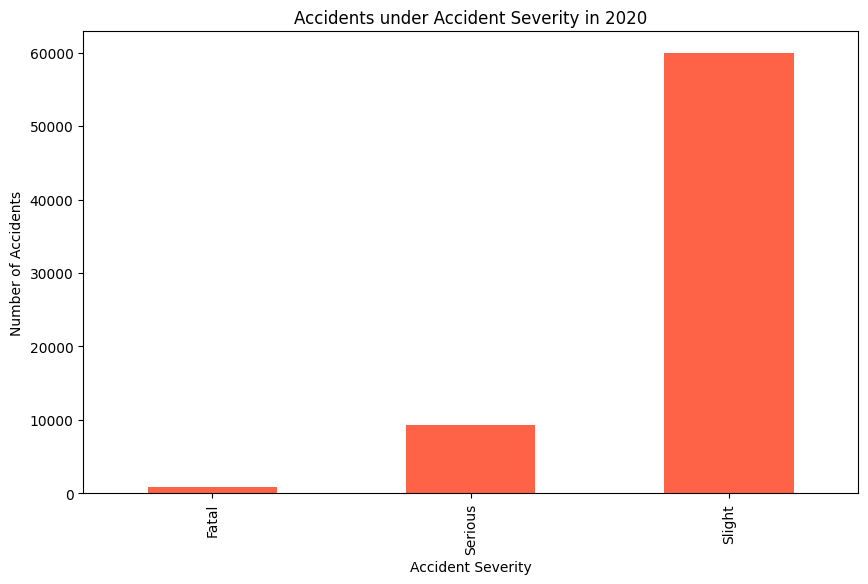

In [48]:
q7_2020 = accidents[accidents['Year'] == 2020].groupby(['Accident_Severity']).size()
q7_2020.plot(kind='bar', color='tomato')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Accidents under Accident Severity in 2020')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q8. How many Accidents happened under Accident Severity in 2021?</h1>
<h1>Insights #8</h1>
<h3>Slight Severity that have 85.37% in year 2021.</h3>

In [49]:
q8 = accidents[accidents['Year'] == 2021]
q8

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021.0,1.0,1.0,4.0
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,5.0,1.0
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,4.0,0.0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021.0,1.0,5.0,1.0
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516241,2.01E+12,Slight,2021-11-12,55.358904,Daylight,Dumfries and Galloway,-3.513667,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2021.0,11.0,12.0,4.0
516242,2.01E+12,Slight,2021-11-12,55.166976,Darkness - no lighting,Dumfries and Galloway,-3.389896,1,1,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2021.0,11.0,12.0,4.0
516247,2.01E+12,Slight,2021-12-01,55.115346,Darkness - no lighting,Dumfries and Galloway,-3.409426,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021.0,12.0,1.0,2.0
516250,2.01E+12,Slight,2021-12-01,55.313433,Darkness - lights lit,Dumfries and Galloway,-3.454262,1,1,Snow,Dual carriageway,Rural,Snowing no high winds,Car,2021.0,12.0,1.0,2.0


In [50]:
q8['Accident_Severity'].value_counts()

Accident_Severity
Slight     56491
Serious     8858
Fatal        823
Name: count, dtype: int64

In [51]:
q8['Accident_Severity'].value_counts().sum()

66172

<h1 style=background-color:lightblue>Q8.</h1>

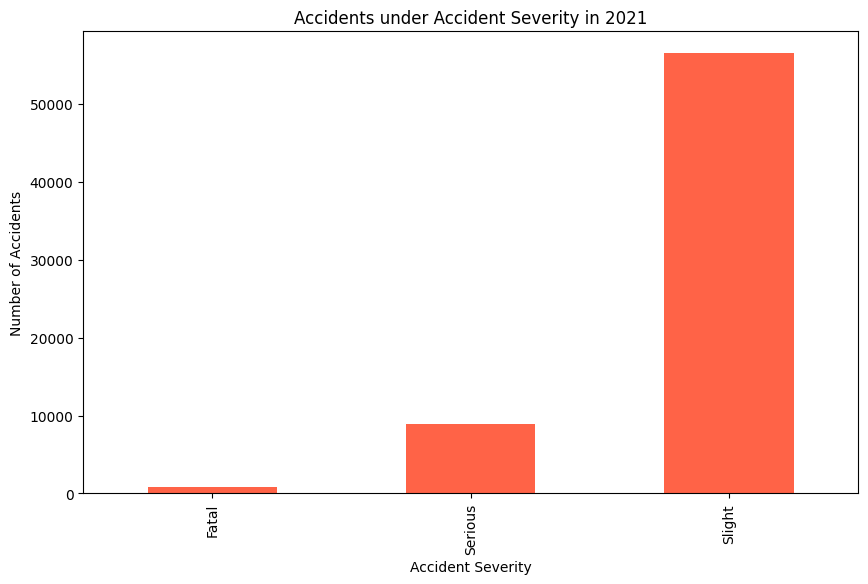

In [52]:
q8_2021 = accidents[accidents['Year'] == 2021].groupby(['Accident_Severity']).size()
q8_2021.plot(kind='bar', color='tomato')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Accidents under Accident Severity in 2021')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q9. How many Accidents happened under Accident Severity in 2022?</h1>
<h1>Insights #9</h1>
<h3>Slight Severity that have 86.11% in year 2022.</h3>

In [53]:
q9 = accidents[accidents['Year'] == 2022]
q9

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
516260,201001BS70003,Slight,2022-01-11,51.484087,Daylight,Kensington and Chelsea,-0.164002,1,2,Wet or damp,Single carriageway,Urban,Other,Car,2022.0,1.0,11.0,1.0
516261,201001BS70004,Slight,2022-01-11,51.509212,Darkness - lights lit,Kensington and Chelsea,-0.195273,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022.0,1.0,11.0,1.0
516262,201001BS70006,Slight,2022-01-12,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022.0,1.0,12.0,2.0
516263,201001BS70007,Slight,2022-01-02,51.513314,Darkness - lights lit,Kensington and Chelsea,-0.198858,1,2,Dry,Roundabout,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022.0,1.0,2.0,6.0
516264,201001BS70008,Slight,2022-01-04,51.484361,Darkness - lights lit,Kensington and Chelsea,-0.175802,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2022.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660657,201091NM00057,Slight,2022-01-02,57.167726,Daylight,Highland,-3.830273,1,1,Snow,Single carriageway,Rural,Fine no high winds,Car,2022.0,1.0,2.0,6.0
660658,201091NM00102,Slight,2022-01-03,57.003355,Daylight,Highland,-4.169644,1,2,Snow,Dual carriageway,Rural,Other,Car,2022.0,1.0,3.0,0.0
660659,201091NM00140,Slight,2022-01-05,57.248688,Daylight,Highland,-3.798648,1,2,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022.0,1.0,5.0,2.0
660660,201091NM00296,Slight,2022-01-08,57.293658,Daylight,Highland,-3.630574,1,2,Frost or ice,Single carriageway,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022.0,1.0,8.0,5.0


In [54]:
q9['Accident_Severity'].value_counts()

Accident_Severity
Slight     48916
Serious     7266
Fatal        623
Name: count, dtype: int64

In [55]:
q9['Accident_Severity'].value_counts().sum()

56805

<h1 style=background-color:lightblue>Q9.</h1>

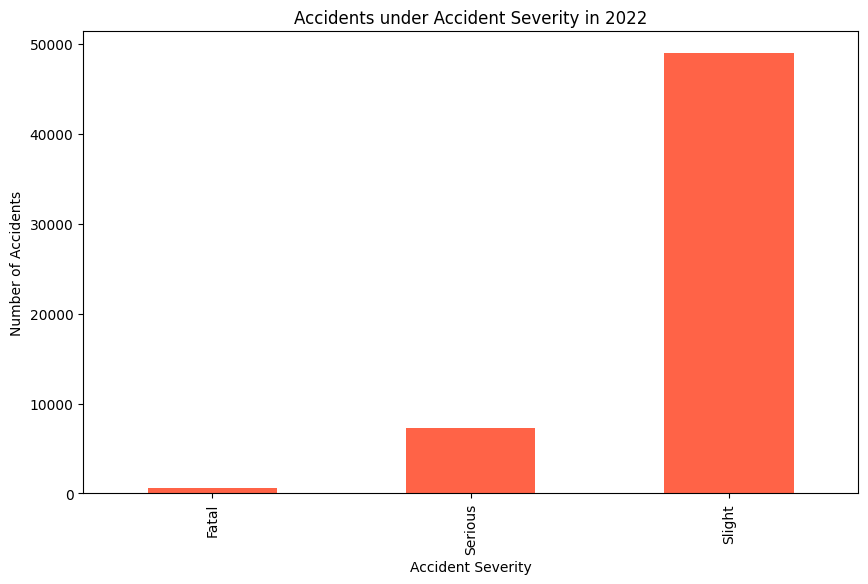

In [56]:
q9_2022 = accidents[accidents['Year'] == 2022].groupby(['Accident_Severity']).size()
q9_2022.plot(kind='bar', color='tomato')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Accidents under Accident Severity in 2022')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q10. What year has the most recorded in Accident Severity?</h1>
<h1>Insights #10</h1>
<h3>Year 2022 has the most recorded that have 86.11%</h3>

<h1 style=background-color:yellow>Q11. Does each year increased the percentage of accidents?</h1>
<h4>2019 - 84.78%</h4>
<h4>2020 - 85.35%</h4>
<h4>2021 - 85.37%</h4>
<h4>2022 - 86.11%</h4>
<h1>Insights #11</h1>
<h3>Yes, every year the percentage of Slight Severity increased.</h3>

<h1 style=background-color:yellow>Q12.  What weather conditions are most dangerous?</h1>
<h1>Insights #12</h1>
<h3>Fine no high winds that have 441,739 slight accidents is the most common accidents.</h3>

In [57]:
q12 = accidents.groupby(["Accident_Severity", "Weather_Conditions"]).size()
q12.unstack()

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unaccounted
Accident_Severity,,,,,,,,,
Fatal,175,7100,82,165,145,848,3,36,107
Serious,1245,72046,483,1801,1261,9468,109,565,1239
Slight,7134,441739,2963,15184,8209,69380,773,5637,12782


<h1 style=background-color:lightblue>Q12.</h1>

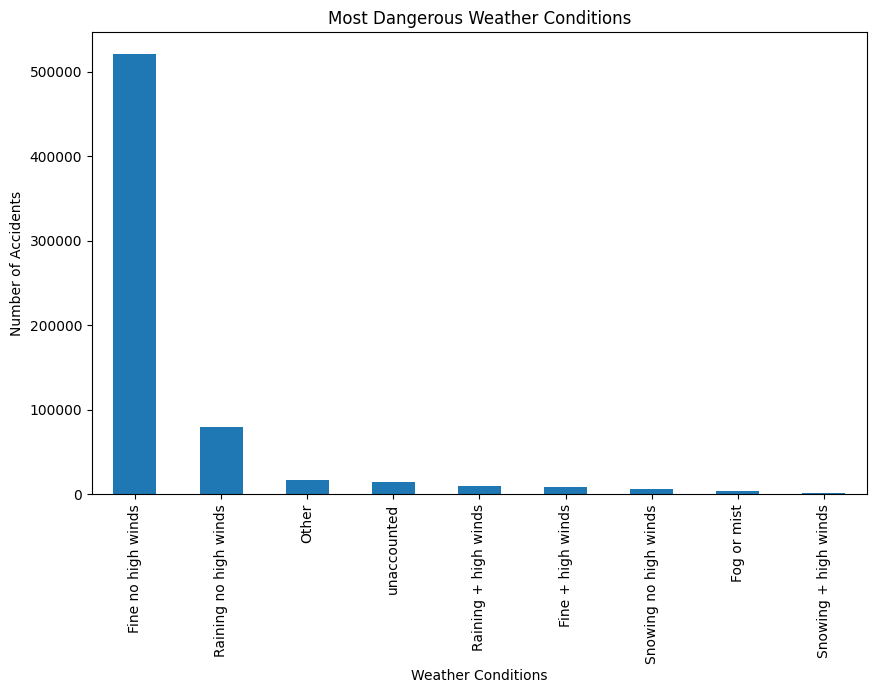

In [58]:
q12_weather = accidents.groupby(['Weather_Conditions']).size().sort_values(ascending=False)
q12_weather.plot(kind='bar')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Most Dangerous Weather Conditions')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q13.  Do more vehicles lead to higher casualties?</h1>
<h1>Insights #13</h1>
<h3>This suggest that as accident increases, the number of casualties per accident also increases.</h3>

In [59]:
q13 = accidents.groupby(["Accident_Severity"])['Number_of_Casualties'].sum().reset_index()
q13

,Accident_Severity,Number_of_Casualties
0,Fatal,16483
1,Serious,129439
2,Slight,750646


<h1 style=background-color:lightblue>Q13.</h1>

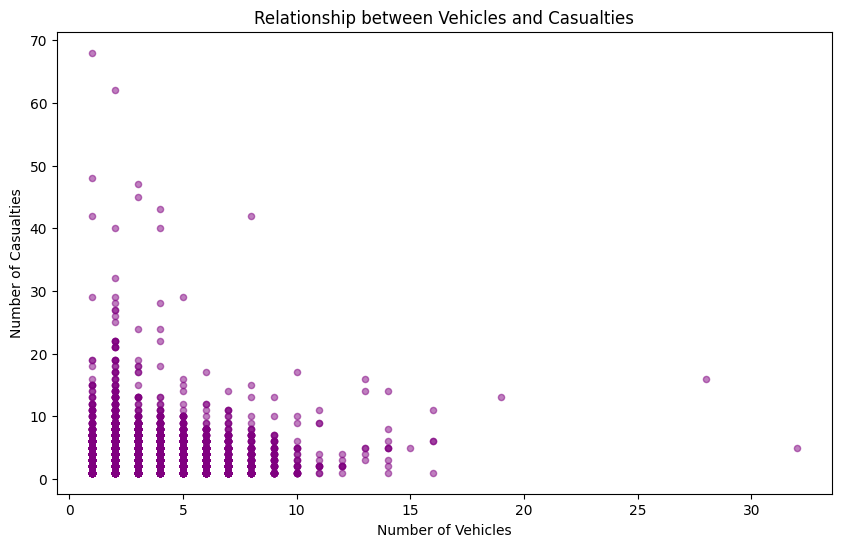

In [60]:
q13_scatter = accidents.plot.scatter(x='Number_of_Vehicles', y='Number_of_Casualties', alpha=0.5, color='purple')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.title('Relationship between Vehicles and Casualties')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>#14 Do accidents involving more vehicle result in a higher number of casualities?</h1>
<h1>Insight #14</h1>
<h3>There is NO CORRELATION between the Number of Vehicles and the Number of Casualties</h3>

In [61]:
accidents['Number_of_Vehicles'].corr(accidents['Number_of_Casualties'])

0.22888886126927557

<h1 style=background-color:lightblue>Q14.</h1>

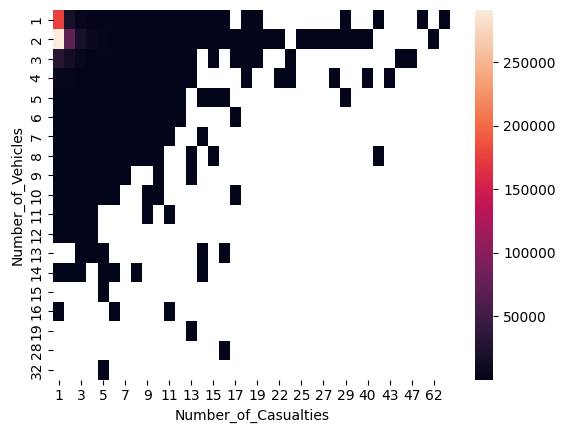

In [62]:
veh_cas = accidents.groupby(['Number_of_Vehicles', 'Number_of_Casualties']).size().unstack()
sns.heatmap(veh_cas)
plt.show()

<h1 style=background-color:yellow>Q15. Are Fatal Accidents more common in Rural or Urban Areas?</h1>
<h1>Insights #15</h1>
<h3>Fatal Accidents are more common in Rural Areas (5,601) than in Urban Areas (3,060)</h3>

In [63]:
q15 = accidents.groupby(["Accident_Severity", "Urban_or_Rural_Area"]).size()
q15.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Accident_Severity,,,
Fatal,5601,0,3060
Serious,37312,1,50904
Slight,196077,10,367714


<h1 style=background-color:lightblue>Q15.</h1>

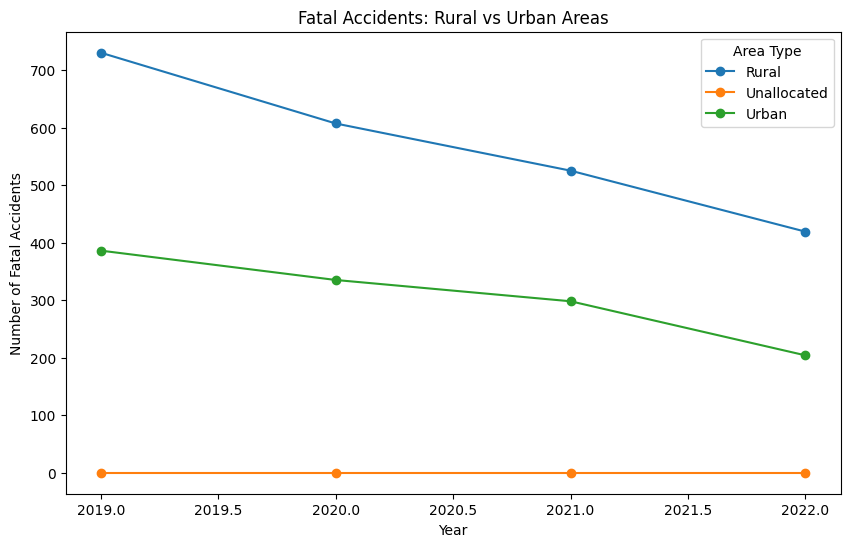

In [64]:
q15_lines = accidents[accidents['Accident_Severity'] == 'Fatal'].groupby(['Year', 'Urban_or_Rural_Area']).size().unstack()
q15_lines.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents: Rural vs Urban Areas')
plt.legend(title='Area Type')
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q16. Which District have the most Fatal Accidents?</h1>
<h1>Insights #16</h1>
<h3>Aberdeenshire has the highest number of Fatal Accidents (66).</h3>

In [65]:
q16 = accidents.groupby(["Accident_Severity", "District Area"]).size()
q16.unstack()

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Accident_Severity,,,,,,,,,,,,,,,,,,,,,
Fatal,12,66,8,24,6,19,32,27,15,11,...,13,20,3,4,14,30,20,15,22,21
Serious,239,463,101,143,33,173,163,184,253,201,...,167,282,74,140,148,193,216,186,132,255
Slight,1072,1401,510,961,193,1155,601,625,1108,1183,...,1130,2164,781,864,1140,1138,1493,1037,815,1621


<h1 style=background-color:yellow>Q17. Which Road Type has the highest average casualties for fatal accidents?</h1>
<h1>Insights #17</h1>
<h3>Single Carriageway roads have the highest number of fatal accident casualties that has 6,560.</h3>

In [67]:
q17 = accidents.groupby(["Accident_Severity", "Road_Type"])['Number_of_Casualties'].sum().reset_index()
q17

,Accident_Severity,Road_Type,Number_of_Casualties
0,Fatal,Dual carriageway,3598
1,Fatal,One way street,121
2,Fatal,Roundabout,194
3,Fatal,Single carriageway,12423
4,Fatal,Slip road,147
5,Serious,Dual carriageway,19195
6,Serious,One way street,2028
7,Serious,Roundabout,4674
8,Serious,Single carriageway,102606
9,Serious,Slip road,936


<h1 style=background-color:lightblue>Q17.</h1>

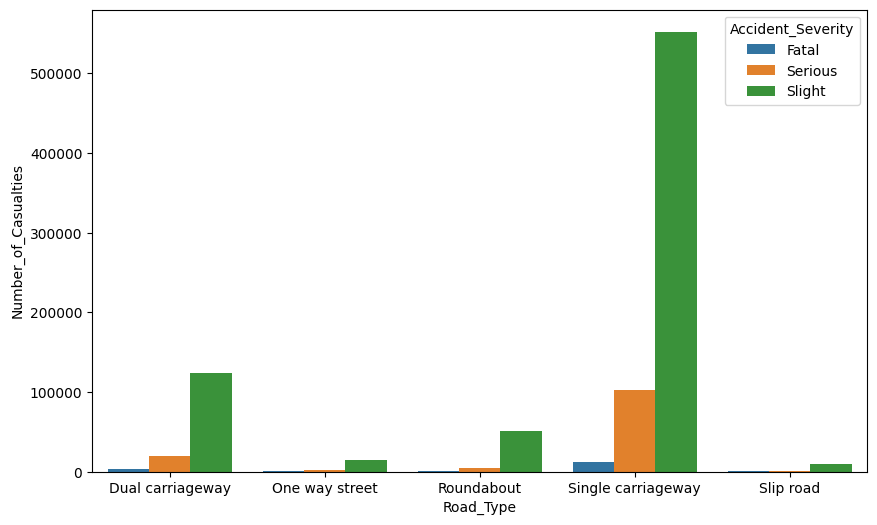

In [74]:
sns.barplot(data=q17, x="Road_Type", y="Number_of_Casualties", hue="Accident_Severity")
plt.gcf().set_size_inches(10, 6)
plt.show()

<h1 style=background-color:yellow>Q18. Are some District more dangerous in specific weather conditions?</h1>
<h1>Insights #18</h1>
<h3>In Urban has the most dangerous weather conditions is Fine no high winds (339088)</h3>

In [76]:
q18 = accidents.groupby(["Urban_or_Rural_Area", "Weather_Conditions"]).size()
q18

Urban_or_Rural_Area  Weather_Conditions   
Rural                Fine + high winds          3993
                     Fine no high winds       181792
                     Fog or mist                2385
                     Other                      7337
                     Raining + high winds       4723
                     Raining no high winds     31173
                     Snowing + high winds        571
                     Snowing no high winds      3050
                     unaccounted                3966
Unallocated          Fine + high winds             1
                     Fine no high winds            5
                     Fog or mist                   0
                     Other                         0
                     Raining + high winds          0
                     Raining no high winds         5
                     Snowing + high winds          0
                     Snowing no high winds         0
                     unaccounted                   0
Urb

<h1 style=background-color:lightblue>Q18.</h1>

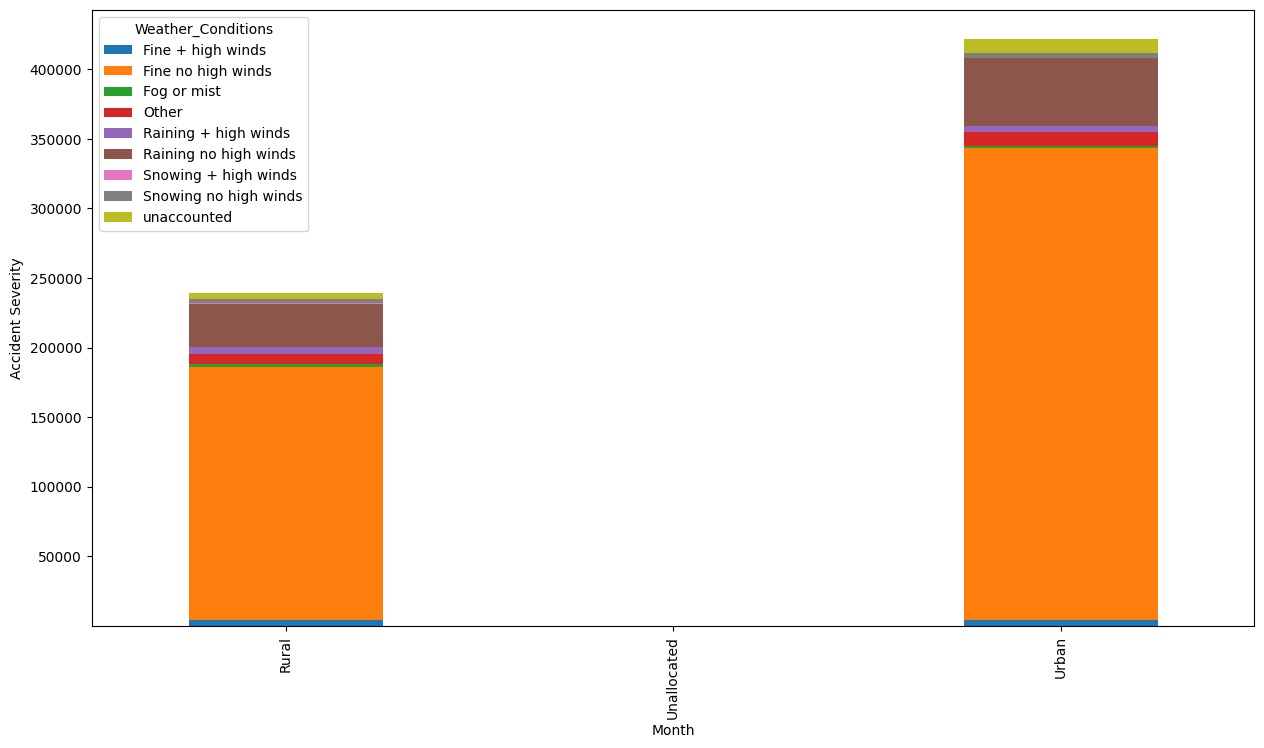

In [78]:
q18_bar = accidents.groupby(['Urban_or_Rural_Area', 'Weather_Conditions']).size().unstack()
q18_bar.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Accident Severity')
plt.gcf().set_size_inches(15,8)
plt.show()

<h1 style=background-color:yellow>Q19. Is there correlation between Urban or Rural Areas in Number of Vehicles?</h1>
<h1>Insights #19</h1>
<h3>Yes, there are correlation between Urban or Rural Areas and Number of Vehicles</h3>

In [81]:
f_stat, p_value = f_oneway(accidents[accidents['Urban_or_Rural_Area'] == 'Urban']['Number_of_Vehicles'],
                accidents[accidents['Urban_or_Rural_Area'] == 'Rural']['Number_of_Vehicles'])

p_value

9.09607802972544e-198

<h1 style=background-color:lightblue>Q19.</h1>

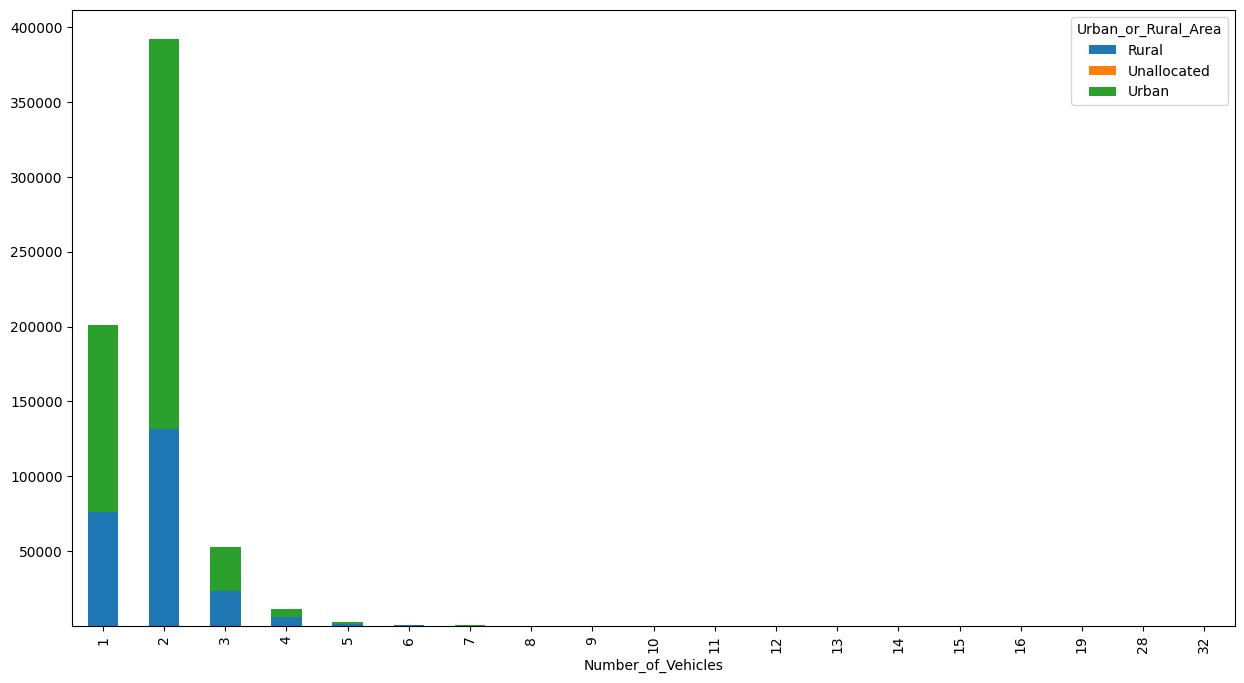

In [79]:
q19_bar = accidents.groupby(['Number_of_Vehicles','Urban_or_Rural_Area']).size().unstack()
q19_bar.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15,8)
plt.show()

<h1 style=background-color:yellow>Q20. Is there correlation between Weather Conditions in Number of Casualties?</h1>
<h1>Insights #20</h1>
<h3>Yes, there are correlation between Weather Conditions and Number of Casualties</h3>

In [82]:
f_stat, p_value = f_oneway(
    accidents[accidents['Weather_Conditions'] == 'Fine no high winds']['Number_of_Casualties'],
    accidents[accidents['Weather_Conditions'] == 'Raining no high winds']['Number_of_Casualties'],
    accidents[accidents['Weather_Conditions'] == 'Snowing no high winds']['Number_of_Casualties'],
    accidents[accidents['Weather_Conditions'] == 'Fog or mist']['Number_of_Casualties'])

p_value

2.785866515872616e-83

<h1 style=background-color:lightblue>Q20. </h1>

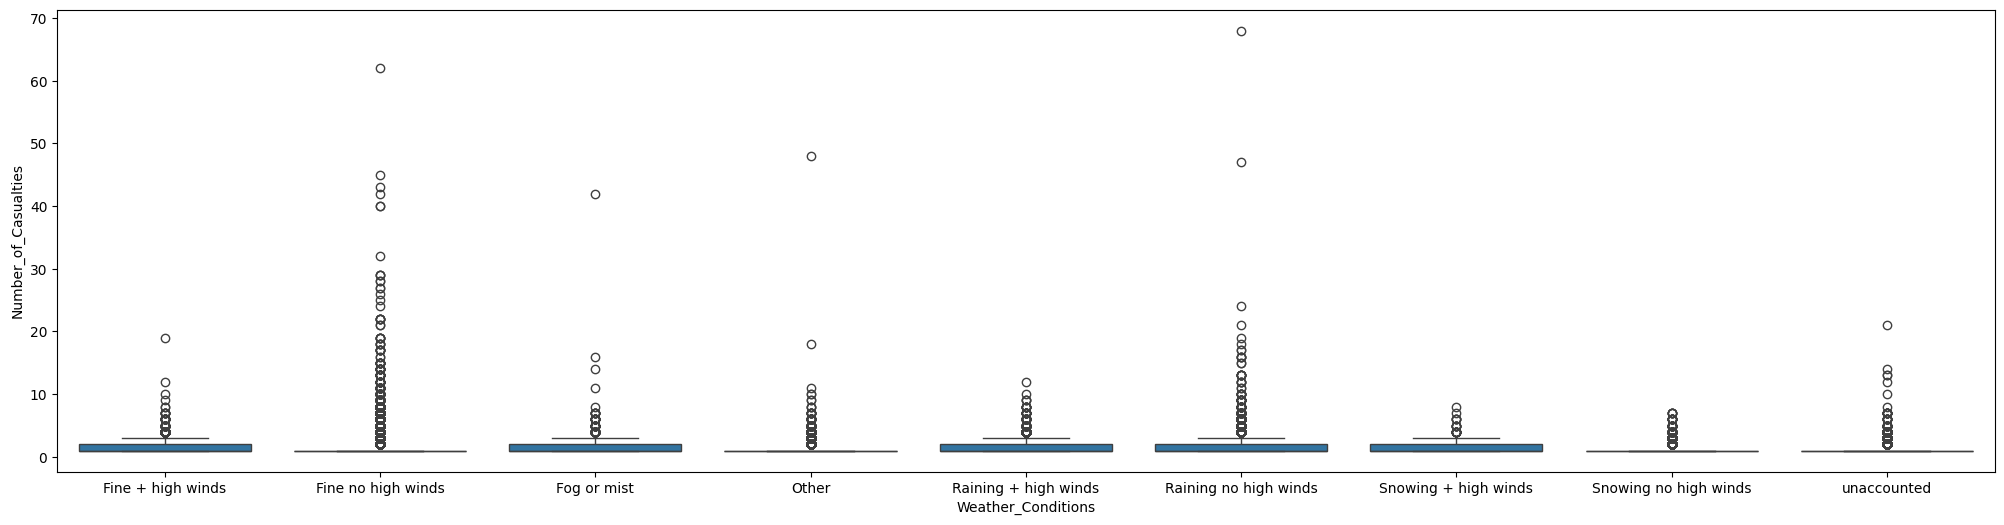

In [87]:
sns.boxplot(data=accidents, x='Weather_Conditions', y='Number_of_Casualties')
plt.gcf().set_size_inches(25, 6)
plt.show()